**Linear Algebra**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

# Woodbury Matrix Identity


$$
    (A + BD^{-1}C)^{-1} = A^{-1} - A^{-1}B(D + CA^{-1}B)^{-1}CA^{-1}
$$

In [3]:
n = 10**3
A = np.random.randn(n, n)
B = np.random.randn(n, n)
D = np.random.randn(n, n)
C = np.random.randn(n, n)

In [4]:
inv_A = linalg.inv(A)
inv_D = linalg.inv(D)

left = linalg.inv(A + B @ inv_D @ C)
right = inv_A - inv_A @ B @ linalg.inv(D + C @ inv_A @ B) @ C @ inv_A

assert np.allclose(left, right)

In [5]:
np.allclose(left, right)

True

# SVD Decomposition on an Example (image)

In [6]:
import matplotlib.image as mpimg

# Read the image (in RGB format)
img_array = mpimg.imread("figures/einstein.jpg")

print(type(img_array))
print(img_array.shape)

<class 'numpy.ndarray'>
(4333, 3250)


In [7]:
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
img_array

array([[0.25098039, 0.24313725, 0.23137255, ..., 0.10980392, 0.09803922,
        0.09803922],
       [0.23137255, 0.24313725, 0.24705882, ..., 0.09803922, 0.10196078,
        0.10196078],
       [0.22745098, 0.24313725, 0.25882353, ..., 0.09411765, 0.10588235,
        0.10588235],
       ...,
       [0.06666667, 0.07058824, 0.0745098 , ..., 0.25098039, 0.26666667,
        0.29803922],
       [0.06666667, 0.0745098 , 0.0745098 , ..., 0.2745098 , 0.30196078,
        0.33333333],
       [0.06666667, 0.0745098 , 0.07843137, ..., 0.29803922, 0.33333333,
        0.36470588]], shape=(4333, 3250))

In [8]:
U, S, V_T = np.linalg.svd(img_array)

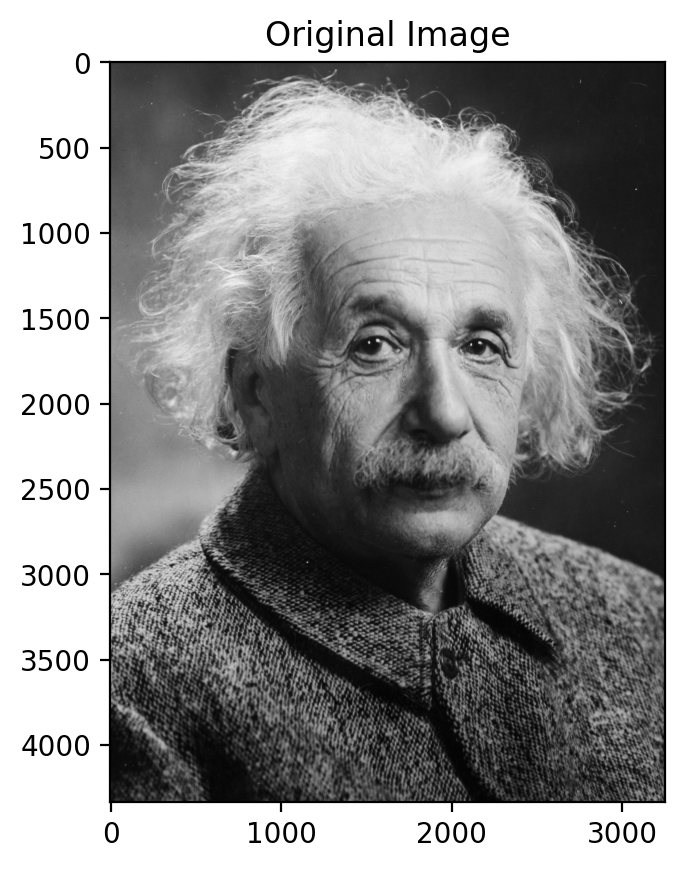

In [9]:
fig, ax = plt.subplots()
ax.imshow(img_array, cmap="gray")
ax.set_title("Original Image")
plt.show()

In [22]:
print(f"Shape U: {U.shape}")
print(f"Shape S: {S.shape}")
print(f"Shape V_T: {V_T.shape}")

Shape U: (4333, 4333)
Shape S: (3250,)
Shape V_T: (3250, 3250)


We can reconstruct the original image by multiplying U, S, and V_T back together.

In [10]:
S_full = np.zeros_like(img_array)
S_full[: S.shape[0], : S.shape[0]] = np.diag(S)
reconstructed_img = U @ S_full @ V_T

In [11]:
assert np.allclose(img_array, reconstructed_img)

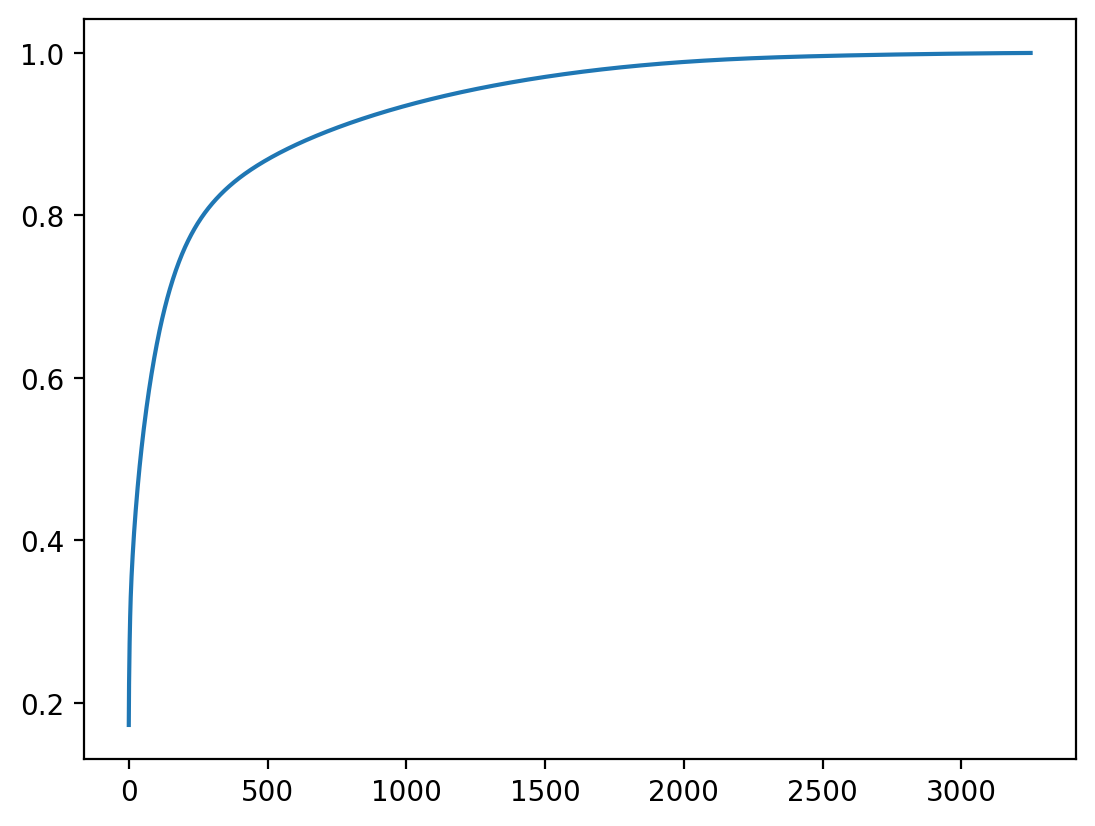

In [15]:
plt.plot(np.cumsum(S) / np.sum(S))

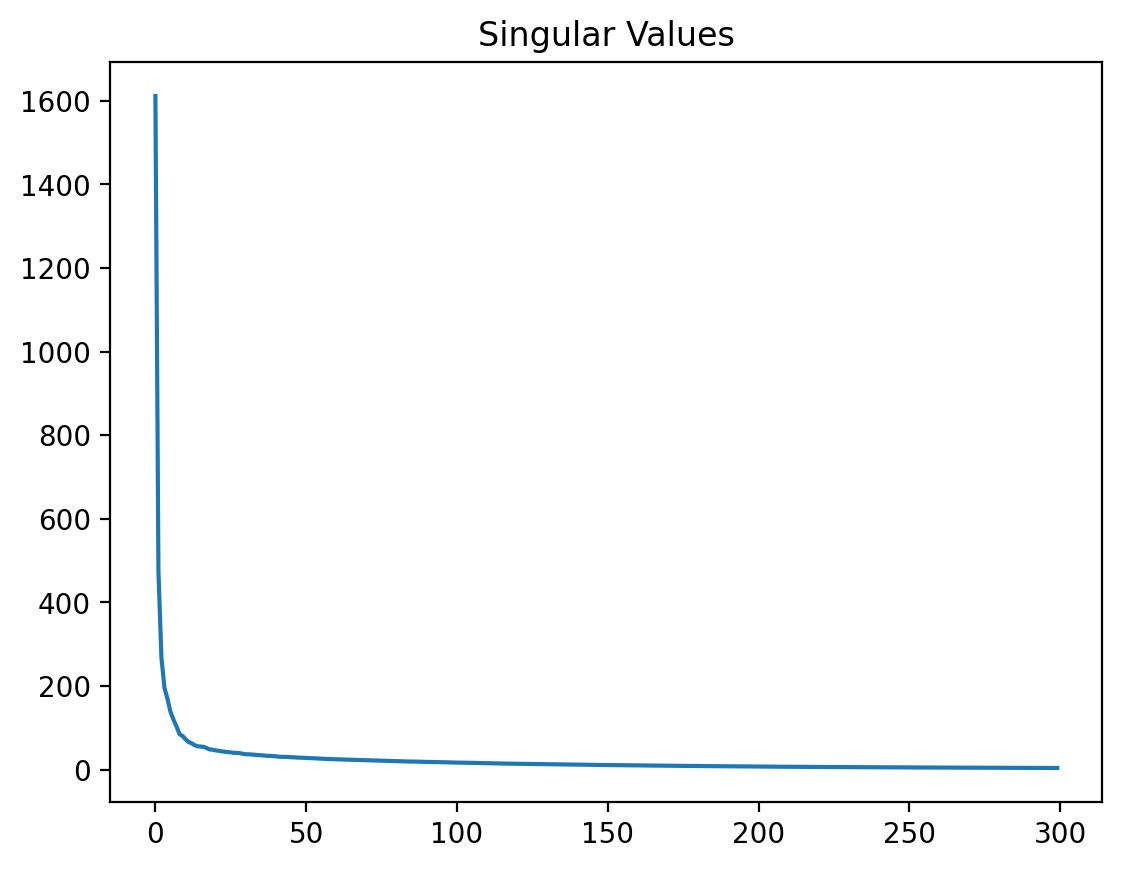

In [27]:
fig, ax = plt.subplots()
ax.plot(S[:300])
ax.set_title("Singular Values")
plt.show()

SVD is widely used in machine learning for dimensionality reduction, noise reduction, and data compression.

Let us try to use SVD on the image.

In [31]:
n_approx = 300

Method 1: use loop (avoid this as much as possible, non-pythonic way of doing things)

In [102]:
img_approx = np.zeros_like(img_array, dtype=float)
for i in range(n_approx):
    img_approx += S[i] * U[:, i].reshape(-1, 1) @ V_T[i, :].reshape(1, -1)
    # img_approx += S[i] * np.outer(U[:, i], V_T[i, :])

In [32]:
img_approx = U[:, :n_approx] * S[:n_approx] @ V_T[:n_approx, :]

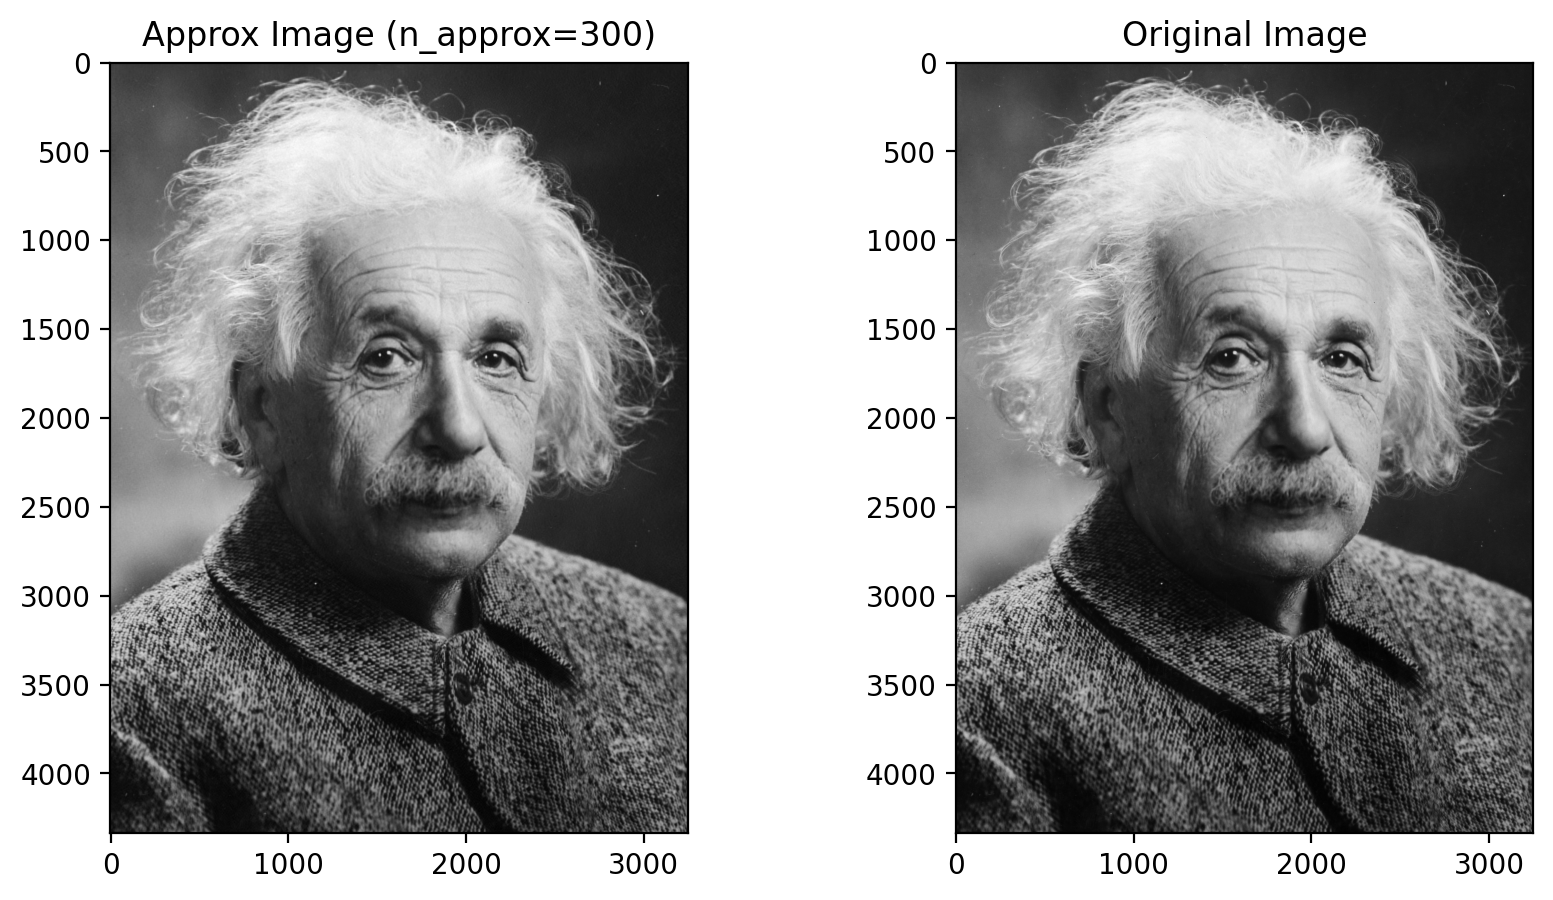

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_approx, cmap="gray")
ax[0].set_title(f"Approx Image (n_approx={n_approx})")
ax[1].imshow(img_array, cmap="gray")
ax[1].set_title("Original Image")
plt.show()